<a href="https://colab.research.google.com/github/mohanv9/Machine-learning/blob/main/DL_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Import Libraries/Dataset

### 1.1 Importing required libraries

In [2]:
# Import required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import time
import seaborn as sns

# Create Datasets
import shutil

from tensorflow import keras
import datetime

from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

### 1.2 Collecting Data from Kaggle

In [3]:
# Downloading & Unzipping the data - donot run


os.environ['KAGGLE_CONFIG_DIR']= "/content/gdrive/MyDrive/DeepLearning"
"""
This code shall be used to download the data from the kaggle url and
store the data in appropriate locations
"""
%cd /content/gdrive/MyDrive/DeepLearning
#Download kaggle dataset
!kaggle datasets download --force ashishsaxena2209/animal-image-datasetdog-cat-and-panda
# create a new folder
!mkdir AnimalClass
# Move the data to dest folder
!mv animal-image-datasetdog-cat-and-panda.zip AnimalClass
# Enter into the folder & unzip the data
%cd AnimalClass
unzip = !unzip animal-image-datasetdog-cat-and-panda.zip    

/content/gdrive/MyDrive/DeepLearning
 96% 360M/376M [00:03<00:00, 121MB/s]
100% 376M/376M [00:04<00:00, 96.6MB/s]
mkdir: cannot create directory ‘AnimalClass’: File exists
/content/gdrive/My Drive/DeepLearning/AnimalClass


### 1.3 Train/Test/Validation Split
    Splitting the data into Train, Test and Validation datasets. 
    For this we are creating seperate folder for Train, Test and Validation under new folder called "Final_Dataset". 
    Then we are copying the data into these folder by class wise with the percentage of 70% to the Training, 20% Validation and 10% to the Testing folder. 

In [4]:
# Create new folder and split Data into to Train, test and Validation

class CreateTTV:
  """
  This class shall be used to split the data into Train, Validation and Test set
  and move the data into appropriate locations
  """
  dataset_home = '/content/gdrive/MyDrive/DeepLearning/Final_Dataset/'
  def CreateFolders():
    """
    This function shall used to create new folders for Train, Test, Validation splits
    """
    dataset_home = '/content/gdrive/MyDrive/DeepLearning/Final_Dataset/'
    subdirs = ['train/', 'test/', 'validation/']
    for subdir in subdirs:
      # create label subdirectories
      labeldirs = ['dogs/', 'panda/', 'cats/']
      for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

  def MoveDataTTV():
    """Enumerate all image files into dataset copy them into the dogs/, panda/ or cats/ subdirectory based on their filename.
    Additionally, we can randomly decide to hold back 30% of the images into the test & Validation dataset.
    """
    dataset_home = '/content/gdrive/MyDrive/DeepLearning/Final_Dataset/'
    
    # seed random number generator
    seed(1)
    # define ratio of pictures to use for validation

    test_ratio = 0.10
    val_ratio = 0.20
    # copy training dataset images into subdirectories
    dirs_d = ['dogs', 'panda', 'cats']
    # OriginalData Directory
    src_directory = '/content/gdrive/MyDrive/DeepLearning/AnimalClass/animals/animals'
    for item in dirs_d:
      src = os.path.join(src_directory, item)
      for file in listdir(src):
          sourc = src + '/' + file
          dst_dir = 'train/'
          if random() < test_ratio:
              dst_dir = 'test/'
          if random() < val_ratio:
              dst_dir = 'validation/'
          if item.startswith('cat'):
              dst = dataset_home + dst_dir + 'cats/'  + file
              copyfile(sourc, dst)
              sourc = src + '/'
          elif item.startswith('dog'):
              dst = dataset_home + dst_dir + 'dogs/'  + file
              copyfile(sourc, dst)
              sourc = src + '/'
          elif item.startswith('panda'):
              dst = dataset_home + dst_dir + 'panda/'  + file
              copyfile(sourc, dst)	
              sourc = src + '/'
  def DisplayDataCount(self):
    """
    This function shall used to print the count of the images in Test, train and validation datasets
    """
    self.DATADIR = CreateTTV.dataset_home
    self.CATEGORIES = ['cats', 'dogs', 'panda']

    print('Training: ')
    for i in self.CATEGORIES:
      print('{} images: '.format(i)+str(len(listdir(self.DATADIR + '/train/' + i + '/'))))
    print('\n')
    print('Validation: ')
    for i in self.CATEGORIES:  
      print('{} images: '.format(i)+str(len(listdir(self.DATADIR + '/validation/' + i + '/'))))
    print('\n')
    print('Testing: ')
    for i in self.CATEGORIES:  
      print('{} images: '.format(i)+str(len(listdir(self.DATADIR + '/test/' + i + '/'))))
    print('\n')

In [5]:
splitTTV = CreateTTV()

In [6]:
splitTTV.DisplayDataCount()

Training: 
cats images: 724
dogs images: 750
panda images: 693


Validation: 
cats images: 210
dogs images: 177
panda images: 229


Testing: 
cats images: 66
dogs images: 73
panda images: 78




# 2. Data Exploration & Preprocessing

## 2.1 Data Visualization and augmentation

    i) Plotting sample images from each class </b>

    ii) Applying Data augmentation and plotting augmented images
  

In [7]:
# Creating a class for visualizing the data
class DataVisualization:
  """
  This class shall be used to dispay the content inside the folder and augmented images

  """
  def __init__(self):
    self.path = '/content/gdrive/MyDrive/DeepLearning/Final_Dataset/train'
    self.categories = ['dogs', 'panda', 'cats']


  def DisplaySamples(self):
    """
    This function shall used to display the few images from the each class
    """
    
    for category in self.categories:
      #plt.figure(figsize=(10,10))
      fig, _ = plt.subplots(1,3, figsize=(10, 10))
      fig.suptitle(category)
      fig.patch.set_facecolor('xkcd:white')
      for k, v in enumerate(os.listdir(self.path+"/"+category)[:3]):
          img = plt.imread(self.path+"/"+category+'/'+v)
          plt.subplot(3, 4, k+1)
          plt.axis('off')
          #plt.figure(figsize=(4,4))
          plt.imshow(img, )
      plt.show()

  def DisplayAugmented(self):
    """
    This function shall used to apply data augmentation on each image class and
    Plots augmented images
    """
    for item in self.categories:
      print(item)
      self.imagepath_main = os.path.join(self.path, item)
      for file in listdir(self.imagepath_main)[4:5]:
        print("printing Original Image: ")
        self.imagepath = self.imagepath_main + '/' + file
        
        image = load_img(self.imagepath)
        plt.imshow(image)
        plt.show()

        print("Printing augmented Images: ")
        image1 = img_to_array(image)
        image2 = np.expand_dims(image,axis=0)

        plt.figure(figsize=(10,10))
        # load the image
        img = load_img(self.imagepath)
        # convert to numpy array
        data = img_to_array(img)
        # expand dimension to one sample
        samples = np.expand_dims(data, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(rotation_range=40,
                                    height_shift_range=0.2,
                                    fill_mode='reflect',
                                    zoom_range=0.2)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(6):
            # define subplot
            plt.subplot(330 + 1 + i)
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
            # plot raw pixel data
            plt.imshow(image)
        # show the figure
        plt.show()

  def DisplayImageSize(self):
    """
    This function shall used to check the size of all images, whether they are in
    same size or not
    """
    shape0 = []
    shape1 = []

    for category in self.categories:
        for files in os.listdir(self.path+"/"+category):
            shape0.append(plt.imread(self.path+"/"+category+'/'+ files).shape[0])
            shape1.append(plt.imread(self.path+"/"+category+'/'+ files).shape[1])
        print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
        print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
        shape0 = []
        shape1 = []


### 2.1.1 Plot at least two samples from each class (cats, dogs & panda)

In [8]:
dataviz = DataVisualization()

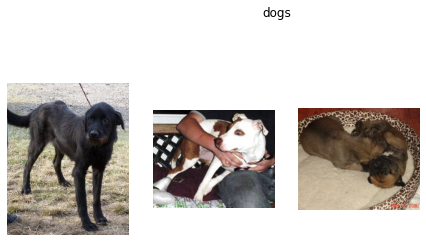

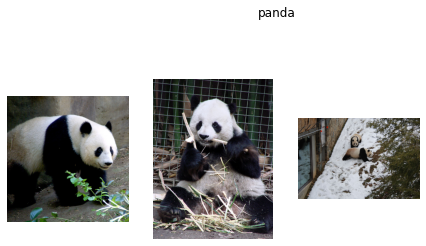

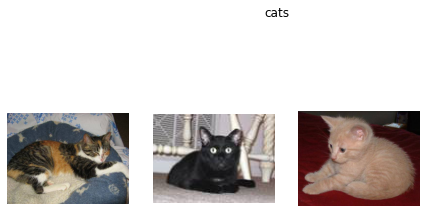

In [9]:
dataviz.DisplaySamples()

### 2.1.2 Apply rotation and height shift augmentation (rotation_range, height_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

dogs
printing Original Image: 


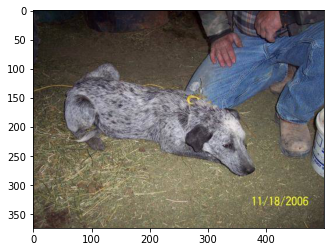

Printing augmented Images: 


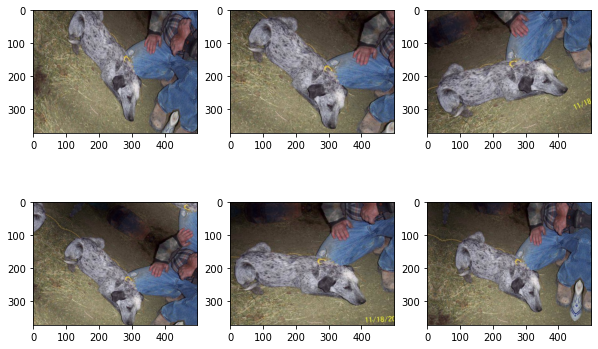

panda
printing Original Image: 


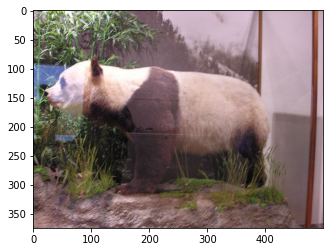

Printing augmented Images: 


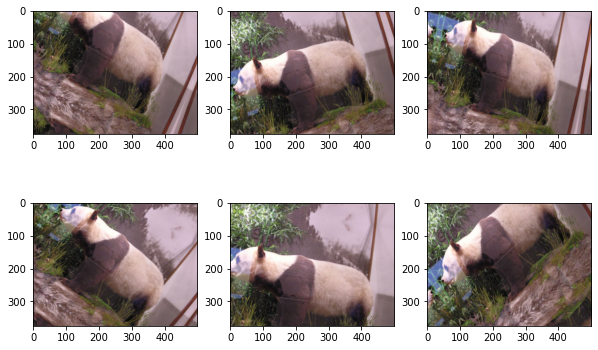

cats
printing Original Image: 


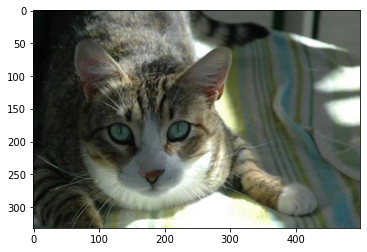

Printing augmented Images: 


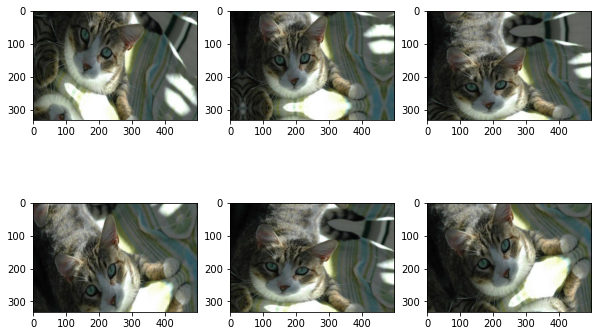

In [10]:
dataviz.DisplayAugmented()

In [11]:
dataviz.DisplayImageSize()

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  60
cats  => height max :  500 width max :  500


    We can see the Heigh and Width of all the images are not same, we need bring all images to same size

### 2.1.3 Bring the train and test data in the required format.
    i) Bring the Data in the required format

    ii) Print the shape of train and test data

In [3]:
class DataPreprocessing:
  """ 
  This class shall be used to preprocess the images into required format
  """
  DATADIR = '/content/gdrive/MyDrive/DeepLearning/Final_Dataset/'
  def __init__(self):
    pass
  def ImageDataGen(self, IMG_SIZE, BATCH_SIZE):
    """
    This function shall used to bring the data into required format and applies data augmentation each image.
    creating Train, test and validation generators using ImageDataGenerator Keras library
    """
    # Resize the Data
    self.IMG_SIZE = IMG_SIZE
    self.BATCH_SIZE = BATCH_SIZE
    self.train_datagen = ImageDataGenerator(
          rescale=1 / 255.0,
          rotation_range=20,
          zoom_range=0.05,
          width_shift_range=0.05,
          height_shift_range=0.05,
          shear_range=0.05,
          horizontal_flip=True,
          fill_mode="reflect")
    
    self.Validation_datagen = ImageDataGenerator(rescale=1/255.0)

    self.test_datagen = ImageDataGenerator(rescale=1/255.0)

    self.train_generator = self.train_datagen.flow_from_directory(DataPreprocessing.DATADIR + '/train/',
                                                        target_size = (self.IMG_SIZE, self.IMG_SIZE),
                                                        batch_size = self.BATCH_SIZE,
                                                        class_mode = 'binary', #{'categorical', 'binary', 'input', 'sparse', None}
                                                        shuffle=True)

    self.validation_generator = self.Validation_datagen.flow_from_directory(DataPreprocessing.DATADIR + '/validation/',
                                                        target_size = (self.IMG_SIZE, self.IMG_SIZE),
                                                        batch_size = self.BATCH_SIZE,
                                                        class_mode = 'binary',
                                                        shuffle=True)

    self.test_generator = self.test_datagen.flow_from_directory(DataPreprocessing.DATADIR + '/test/',
                                                        target_size = (self.IMG_SIZE, self.IMG_SIZE),
                                                        class_mode = 'binary',
                                                        shuffle=True)
    print('\n')
    print(self.train_generator.class_indices)
  def DataShape(self):
    """
    This function shall used to print the shape of the Train and Validation dataset
    """
    x=np.concatenate([self.train_generator.next()[0] for i in range(self.train_generator.__len__())])
    y=np.concatenate([self.train_generator.next()[1] for i in range(self.train_generator.__len__())])      
    print("Training data shape: ")
    print(x.shape)
    print(y.shape)
    x=np.concatenate([self.validation_generator.next()[0] for i in range(self.validation_generator.__len__())])
    y=np.concatenate([self.validation_generator.next()[1] for i in range(self.validation_generator.__len__())])      
    print("Validation data shape: ")
    print(x.shape)
    print(y.shape)


    1) We cannot perform training on raw images, we are transfering the images into array and scaling them to 0-1. 
    Applying this transformation on each dataset (Train , Validation & Test).

    2) Since we have a less training data, we are applying image augumentation for only training data to improve the training accuracy </b>

In [13]:
Preprocess = DataPreprocessing()
Preprocess.ImageDataGen(100, 96)

Found 2167 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'panda': 2}


### 2.1.4 Print the shapes of train and test data.
    Training dataset has 2167 images and of 100x100x3 size. where the validation set has 616 total images. 
    We will use both training and validatation datagens for model training


In [14]:
Preprocess.DataShape()

Training data shape: 
(2167, 100, 100, 3)
(2167,)
Validation data shape: 
(616, 100, 100, 3)
(616,)


# 3. Model Creation
This Class contains

    i) Model Building
    
    ii) Model Compilation

    iii) Model Training

In [15]:
class ModelBuilding(DataPreprocessing):
  """
  This class shall be used to build the model and train the model
  """
  def __init__(self):
    self.model = Sequential()
  def ConstructModel(self):
    self.model
    self.model.add(Flatten(input_shape=(100, 100, 3)))
    self.model.add(Dense(1024,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))
    self.model.add(Dense(512,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))
    self.model.add(Dropout(0.5))
    self.model.add(Dense(128,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))
    
    self.model.add(Dense(3, activation="softmax", ))

    

    print(self.model.summary())

  
  def compileModel(self, optimizer, loss, metrics):
    #self.model = model
    self.optimizer = optimizer
    self.loss = loss
    self. metrics = metrics
    self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=[self.metrics])


  def TrainModel(self, epoch):
    start = datetime.datetime.now()
    #self.model = model
    super().ImageDataGen(100, 96)
    self.epoch = epoch
    self.history = self.model.fit(self.train_generator,
                    steps_per_epoch = self.train_generator.n // self.BATCH_SIZE,
                    epochs=epoch,
                    verbose=1,
                    validation_data=self.validation_generator,
                    validation_steps = self.validation_generator.n // self.BATCH_SIZE
                    )
    
    (eval_loss, eval_accuracy) = self.model.evaluate_generator( 
    self.validation_generator, self.BATCH_SIZE, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
    print("[INFO] Loss: {}".format(eval_loss)) 
    end= datetime.datetime.now()
    elapsed= end-start
    print ("Time taken: {} seconds".format(elapsed))
    return self.history, self.model
  

### 3.1 Model Building
  #### 3.1.1 Building Sequential Model:
  
    Number of neurons:  There are some thumb rules available for calculating the number of hidden neurons 
  
    1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
    2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
    3. The number of hidden neurons should be less than twice the size of the input layer.
    4. In order to secure the ability of the network to generalize the number of nodes has to be kept as low as possible

    However, the selection of an architecture for neural network will always come down to trail and error.

    1. Using too few neurons in the hidden layers will result in something called underfitting.
    2. Using too many neurons in the hidden layers can result in overfitting.

    We have traied several combinations and obsevred Training and Validation loss and accuracy curves. 
    we finally got the best result with ***3 hidden layers with 1024, 512 and 128 neurons***.


  #### 3.1.2 L2 Regularization: 
    Applied L2 = 000.1 regularization to all the layers.

  #### 3.1.3 Dropout layer:
    Dropout is stochastic regularization technique, It works well in practice because it prevents the co-adaption of neurons during the training phase. 
    In this model we are adding dropout at the second hidden layer to control the huge number of parameter coming from the 1st layer, thus it prevents overfitting. 

  #### 3.1.3 Activation Function:
    In this model we are using 'Relu activation function for the Hidden layers and
    'Softmax' for the out layer.

  #### 3.1.4 Print the model summary </b>





In [16]:
runmodel = ModelBuilding()

In [17]:
runmodel.ConstructModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              30721024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 31,311,875
Trainable params: 31,311,875
Non-trainable params: 0
____________________________________________

### 3.2 Model Compilation
  #### 3.2.1 Loss function:
    "sparse_categorical_crossentropy"

  #### 3.2.2 Optimizer:
    We have initially trained our model with SGD and then with Adam optimizer. We saw a big difference using Adam optimizer. 
    Adam optimizer is a combined idea of Gradient Descent with momentum and RmsProp.'
    Adam maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

    Hence, we have given a constant learning rate value of 0.0003 (3e-4). this value works well for fully connected layers

  #### 3.2.3 <b> Used accuracy as a metric</b>

In [18]:
opt = Adam(3e-4)
runmodel.compileModel(opt, 'sparse_categorical_crossentropy', 'accuracy')

### 3.3 Model Training

#### 3.3.1 Training the model for 72 epochs and printing train and validation accuracy and loss for each epoch. Priting time taken for the training


In [19]:

history, fmodel =  runmodel.TrainModel(63)


Found 2167 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'panda': 2}
Epoch 1/63
22/22 [==============================] - 30s 715ms/step - loss: 3.7363 - accuracy: 0.3514 - val_loss: 1.4851 - val_accuracy: 0.3819
Epoch 2/63
22/22 [==============================] - 15s 689ms/step - loss: 1.7238 - accuracy: 0.3982 - val_loss: 1.3522 - val_accuracy: 0.4792
Epoch 3/63
22/22 [==============================] - 16s 719ms/step - loss: 1.3595 - accuracy: 0.4710 - val_loss: 1.2250 - val_accuracy: 0.4913
Epoch 4/63
22/22 [==============================] - 15s 689ms/step - loss: 1.2720 - accuracy: 0.5082 - val_loss: 1.1186 - val_accuracy: 0.5608
Epoch 5/63
22/22 [==============================] - 15s 699ms/step - loss: 1.2639 - accuracy: 0.4877 - val_loss: 1.1392 - val_accuracy: 0.5469
Epoch 6/63
22/22 [==============================] - 15s 696ms/step - loss: 1.2278 - accuracy: 0.4918 - val_loss: 1.1236 - va

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


96/96 [==============================] - 3s 22ms/step - loss: 0.8451 - accuracy: 0.6136
[INFO] accuracy: 61.36%
[INFO] Loss: 0.845117449760437
Time taken: 0:18:05.461347 seconds


#### 3.3.2 Plot the accuracy and loss graph for train and validation set.

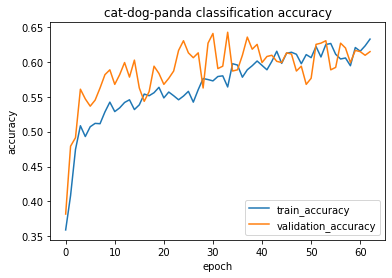

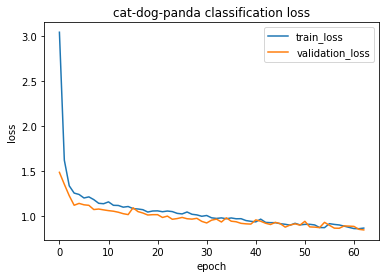

In [20]:
# Model Evaluation

def plot_accuracy(title, history):
  plt.title(title)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
  plt.show()
plot_accuracy("cat-dog-panda classification accuracy", history)
    
def plot_loss(title, history):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

plot_loss("cat-dog-panda classification loss", history)



# 4. Model Evaluation

In [21]:
class EvaluateModel(ModelBuilding, DataPreprocessing):

  """
  This class shall used to evaluated the performance of the model
  """
  def __init__(self, model):
    self.model = model

  def ModelPredict(self):
    super().ImageDataGen(100, 96)
    self.prediction = self.model.predict_generator(self.test_generator)
    self.predictions = np.argmax(self.prediction, axis=1)
    print('Confusion Matrix')
    cm = confusion_matrix(self.test_generator.classes, self.predictions)
    print(cm)
    print('Classification Report')
    print(classification_report(self.test_generator.classes, self.predictions))
   

    sns.heatmap(cm, annot=True)

  def ModelEvaluate(self):
    self.model.evaluate_generator(self.test_generator, steps=9)
    self.categories = ['cats', 'dogs', 'panda']
    imgs, labels = next(self.test_generator)
    fig = plt.figure(figsize=(10,10))
    columns = 4
    rows = 5
    for i in range(columns * rows):
      fig.add_subplot(rows, columns, i+1)
      img_t = np.expand_dims(imgs[i], axis=0)
      prediction = self.model.predict(img_t)
      idx = prediction[0].tolist().index(max(prediction[0]))
      plt.text(20, 58, self.categories[idx], color='red', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.8))
      plt.imshow(imgs[i])



### 4.1 Print confusion matrix and classification report for the validation dataset.

In [22]:
evaluation = EvaluateModel(fmodel)

Found 2167 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'panda': 2}


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[25 17 24]
 [21 24 28]
 [26 23 29]]
Classification Report
              precision    recall  f1-score   support

           0       0.35      0.38      0.36        66
           1       0.38      0.33      0.35        73
           2       0.36      0.37      0.36        78

    accuracy                           0.36       217
   macro avg       0.36      0.36      0.36       217
weighted avg       0.36      0.36      0.36       217



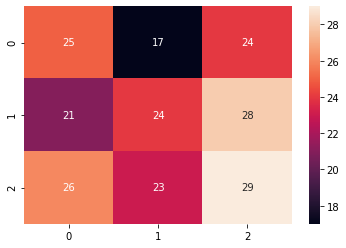

In [23]:
evaluation.ModelPredict()

As we see here, our Model performed well on Panda class but not on Dog class

### 4.2 Print the two most incorrectly classified images for each class 


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


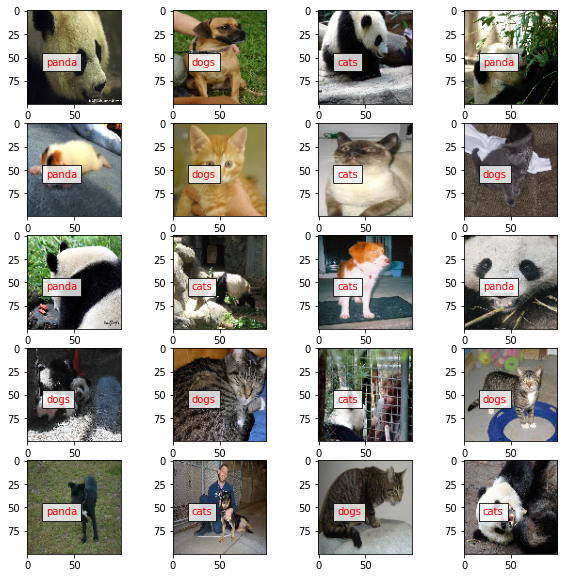

In [25]:
evaluation.ModelEvaluate()

##### Misclassfied Images:
From the above output we can see the misclassified images

<b> Cat: </b>

    Cat misclassified as Dog

    i) 2nd row and 2nd coulumn
    ii) 5th row 3rd column
  
<b> Dog: </b>

    Dog misclassified as cat
    
    i) 3rd row 3rd column
    ii) 5th row 2nd column

<b> Panda: </b>

    Panda misclassified as cat
    i) 1st row 3rd column

    Pand misclassified as dog
    ii) 4th row 1sst column


# 5. Hyperparameter Tuning

### 5.1 Dropout: Change the position and value of dropout layer

In [4]:
class DropModelBuilding(DataPreprocessing):
  """
  This class shall be used to build the model and train the model
  """
  def __init__(self):
    self.model = Sequential()
  def ConstructModel(self):
    self.model
    self.model.add(Flatten(input_shape=(100, 100, 3)))
    self.model.add(Dense(1024,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))    
    self.model.add(Dropout(0.2))
    self.model.add(Dense(512,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))
    self.model.add(Dense(128,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)))
    
    self.model.add(Dense(3, activation="softmax", ))

    

    print(self.model.summary())

  
  def compileModel(self, optimizer, loss, metrics):
    #self.model = model
    self.optimizer = optimizer
    self.loss = loss
    self. metrics = metrics
    self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=[self.metrics])


  def TrainModel(self, epoch):
    start = datetime.datetime.now()
    #self.model = model
    super().ImageDataGen(100, 96)
    self.epoch = epoch
    self.history = self.model.fit(self.train_generator,
                    steps_per_epoch = self.train_generator.n // self.BATCH_SIZE,
                    epochs=epoch,
                    verbose=1,
                    validation_data=self.validation_generator,
                    validation_steps = self.validation_generator.n // self.BATCH_SIZE
                    )
    
    (eval_loss, eval_accuracy) = self.model.evaluate_generator( 
    self.validation_generator, self.BATCH_SIZE, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
    print("[INFO] Loss: {}".format(eval_loss)) 
    end= datetime.datetime.now()
    elapsed= end-start
    print ("Time taken: {} seconds".format(elapsed))
    return self.history, self.model

In [5]:
Drop_model = DropModelBuilding()
Drop_model.ConstructModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              30721024  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 31,311,875
Trainable params: 31,311,875
Non-trainable params: 0
____________________________________________

In [6]:
opt = Adam(3e-4)
Drop_model.compileModel(opt, 'sparse_categorical_crossentropy', 'accuracy')
history, dmodel =  Drop_model.TrainModel(63)

Found 2167 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'panda': 2}
Epoch 1/63
22/22 [==============================] - 602s 27s/step - loss: 3.1788 - accuracy: 0.3563 - val_loss: 1.3027 - val_accuracy: 0.4878
Epoch 2/63
22/22 [==============================] - 19s 856ms/step - loss: 1.4429 - accuracy: 0.4546 - val_loss: 1.2377 - val_accuracy: 0.4948
Epoch 3/63
22/22 [==============================] - 18s 847ms/step - loss: 1.3536 - accuracy: 0.4895 - val_loss: 1.2801 - val_accuracy: 0.5104
Epoch 4/63
22/22 [==============================] - 18s 842ms/step - loss: 1.2210 - accuracy: 0.5081 - val_loss: 1.1870 - val_accuracy: 0.5399
Epoch 5/63
22/22 [==============================] - 19s 852ms/step - loss: 1.2208 - accuracy: 0.5045 - val_loss: 1.2505 - val_accuracy: 0.4844
Epoch 6/63
22/22 [==============================] - 18s 845ms/step - loss: 1.1718 - accuracy: 0.5227 - val_loss: 1.1157 - val

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


96/96 [==============================] - 3s 26ms/step - loss: 0.8761 - accuracy: 0.6120
[INFO] accuracy: 61.20%
[INFO] Loss: 0.8761100172996521
Time taken: 0:31:11.064518 seconds


### 5.2 Regularization: Train a model without regularization

In [7]:
class RegModelBuilding(DataPreprocessing):
  """
  This class shall be used to build the model and train the model
  """
  def __init__(self):
    self.model = Sequential()
  def ConstructModel(self):
    self.model
    self.model.add(Flatten(input_shape=(100, 100, 3)))
    self.model.add(Dense(1024,activation="relu"))
    self.model.add(Dense(512,activation="relu"))
    self.model.add(Dropout(0.5))
    self.model.add(Dense(128,activation="relu"))
    
    self.model.add(Dense(3, activation="softmax", ))

    

    print(self.model.summary())

  
  def compileModel(self, optimizer, loss, metrics):
    #self.model = model
    self.optimizer = optimizer
    self.loss = loss
    self. metrics = metrics
    self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=[self.metrics])


  def TrainModel(self, epoch):
    start = datetime.datetime.now()
    #self.model = model
    super().ImageDataGen(100, 96)
    self.epoch = epoch
    self.history = self.model.fit(self.train_generator,
                    steps_per_epoch = self.train_generator.n // self.BATCH_SIZE,
                    epochs=epoch,
                    verbose=1,
                    validation_data=self.validation_generator,
                    validation_steps = self.validation_generator.n // self.BATCH_SIZE
                    )
    
    (eval_loss, eval_accuracy) = self.model.evaluate_generator( 
    self.validation_generator, self.BATCH_SIZE, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
    print("[INFO] Loss: {}".format(eval_loss)) 
    end= datetime.datetime.now()
    elapsed= end-start
    print ("Time taken: {} seconds".format(elapsed))
    return self.history, self.model

In [8]:
Regularizarion_model = RegModelBuilding()
Regularizarion_model.ConstructModel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              30721024  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 31,311,875
Trainable params: 31,311,875
Non-trainable params: 0
__________________________________________

In [9]:
opt = Adam(3e-4)
Regularizarion_model.compileModel(opt, 'sparse_categorical_crossentropy', 'accuracy')
history, rmodel =  Regularizarion_model.TrainModel(63)

Found 2167 images belonging to 3 classes.
Found 616 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'panda': 2}
Epoch 1/63
22/22 [==============================] - 19s 840ms/step - loss: 4.1757 - accuracy: 0.3599 - val_loss: 1.0976 - val_accuracy: 0.4097
Epoch 2/63
22/22 [==============================] - 17s 802ms/step - loss: 1.5511 - accuracy: 0.4092 - val_loss: 0.9962 - val_accuracy: 0.4861
Epoch 3/63
22/22 [==============================] - 18s 817ms/step - loss: 1.0714 - accuracy: 0.4961 - val_loss: 0.9089 - val_accuracy: 0.5556
Epoch 4/63
22/22 [==============================] - 18s 808ms/step - loss: 1.0062 - accuracy: 0.4954 - val_loss: 0.8915 - val_accuracy: 0.5590
Epoch 5/63
22/22 [==============================] - 18s 801ms/step - loss: 0.9915 - accuracy: 0.4927 - val_loss: 0.8915 - val_accuracy: 0.5556
Epoch 6/63
22/22 [==============================] - 18s 803ms/step - loss: 0.9725 - accuracy: 0.5093 - val_loss: 0.8513 - va

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


96/96 [==============================] - 3s 26ms/step - loss: 0.7255 - accuracy: 0.6477
[INFO] accuracy: 64.77%
[INFO] Loss: 0.7254970669746399
Time taken: 0:19:56.388984 seconds


# Conclusion

We found no big difference in all 3 models with and without regularization and on changing the dropout layer position. There could be several reasons for this.
1. Our model is not overfitting and training well on the data set
2. This might be with the small number of training data

We have actually started our model training without using regularization and we saw the same accuracy as the above. Then we have tried using different LR values though, we didn't see much improvement in our model. 

Hence, we donot required regularizations L2 and dropout for this dataset since our our model is working well without them